# Question 1 and Question 2

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891).data.original

## **Question 1:** 

Which features (among lifestyle factors, health conditions, and demographic variables) are most important for predicting diabetes risk?

#### Preprocessing

In [3]:
# Split data
from sklearn.model_selection import train_test_split
X = cdc_diabetes_health_indicators.drop(columns=['Diabetes_binary'])
y = cdc_diabetes_health_indicators['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Analysis

Train multiple classification models (Logistic Regression, Decision Tree, Random Forest, etc.) to predict Diabetes_binary

Evaluate models using accuracy, precision, recall, F1-score, ROC-AUC, Confusion Matrix

Identify top features using feature importance from tree-based models or coefficients from logistic regression

Compare importance rankings across models

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [5]:
lr_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  g

In [6]:
# Display resultsfor model_name, metrics in results.items():
print(f"Results for {model_name}:")
for metric_name, value in results.items():
    print(f"  {metric_name}: {value}")
print()

Results for Random Forest:
  Logistic Regression: {'Accuracy': 0.8546594134342479, 'Precision': 0.4348011970927747, 'Recall': 0.14386759088980053, 'F1-Score': 0.21619897959183673, 'ROC-AUC': 0.7732811217192261, 'Confusion Matrix': array([[42345,  1322],
       [ 6052,  1017]])}
  Decision Tree: {'Accuracy': 0.7954706717123936, 'Precision': 0.28913819479857217, 'Recall': 0.32083745932946667, 'F1-Score': 0.30416415208207603, 'ROC-AUC': 0.5965718888009232, 'Confusion Matrix': array([[38091,  5576],
       [ 4801,  2268]])}
  Random Forest: {'Accuracy': 0.8631543677073479, 'Precision': 0.5293023255813953, 'Recall': 0.16098458056302165, 'F1-Score': 0.24688144050330837, 'ROC-AUC': 0.8042372036676719, 'Confusion Matrix': array([[42655,  1012],
       [ 5931,  1138]])}



In [7]:
# Extract feature importances
feature_importances = {}
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        importances = model.coef_[0]
    else:
        importances = model.feature_importances_
    feature_importances[model_name] = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display feature importances
for model_name, importances in feature_importances.items():
    print(f"Feature importances for {model_name}:")
    print(importances)
    print()

Feature importances for Logistic Regression:
HighBP                  0.567432
HighChol                0.451195
GenHlth                 0.351681
HeartDiseaseorAttack    0.226879
DiffWalk                0.173119
Sex                     0.109363
Stroke                  0.069995
Age                     0.035437
BMI                     0.031229
ID                     -0.000002
MentHlth               -0.001915
PhysHlth               -0.009144
NoDocbcCost            -0.073163
Income                 -0.084927
Smoker                 -0.089435
HvyAlcoholConsump      -0.096636
AnyHealthcare          -0.172127
CholCheck              -0.175683
Fruits                 -0.179036
Veggies                -0.186336
PhysActivity           -0.269990
Education              -0.576766
dtype: float64

Feature importances for Decision Tree:
ID                      0.273720
BMI                     0.100066
Income                  0.070593
Age                     0.070500
HighBP                  0.069386
PhysHlth 

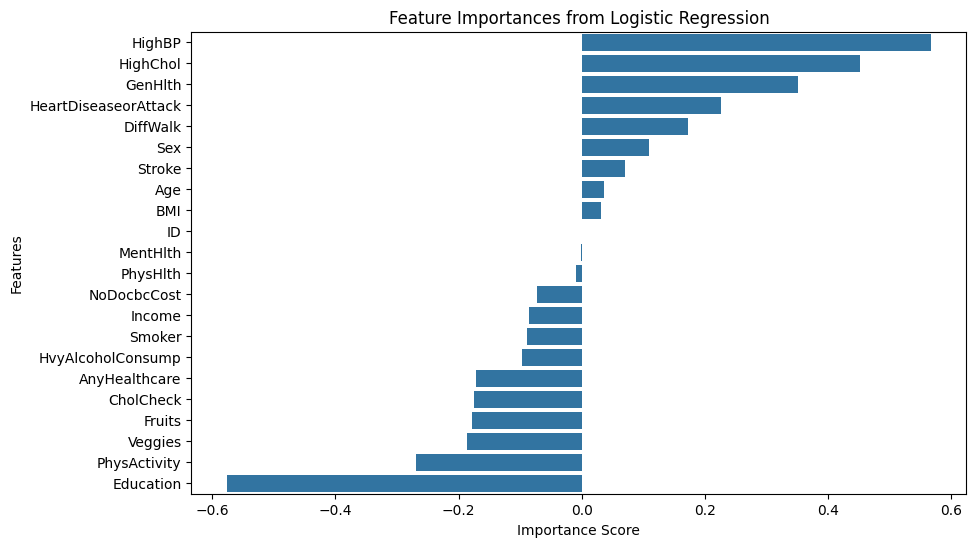

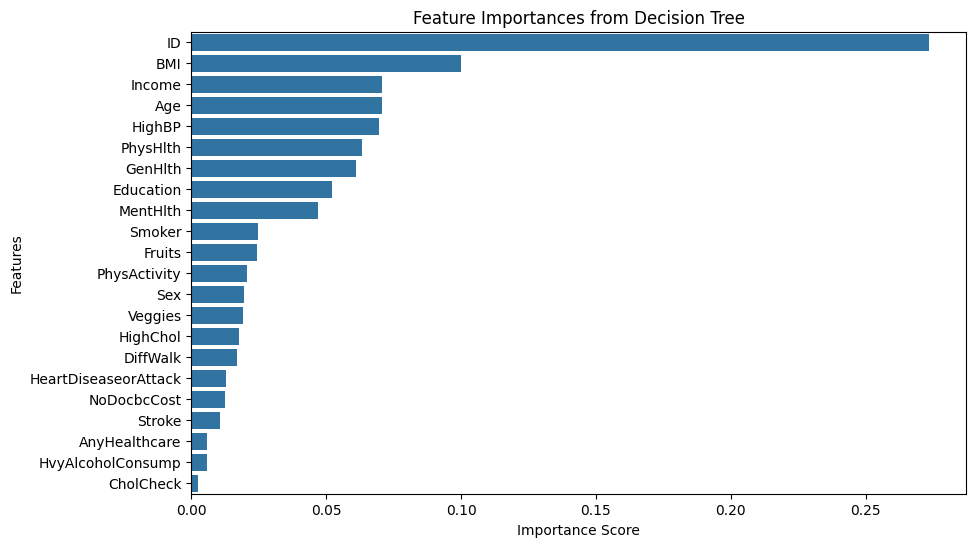

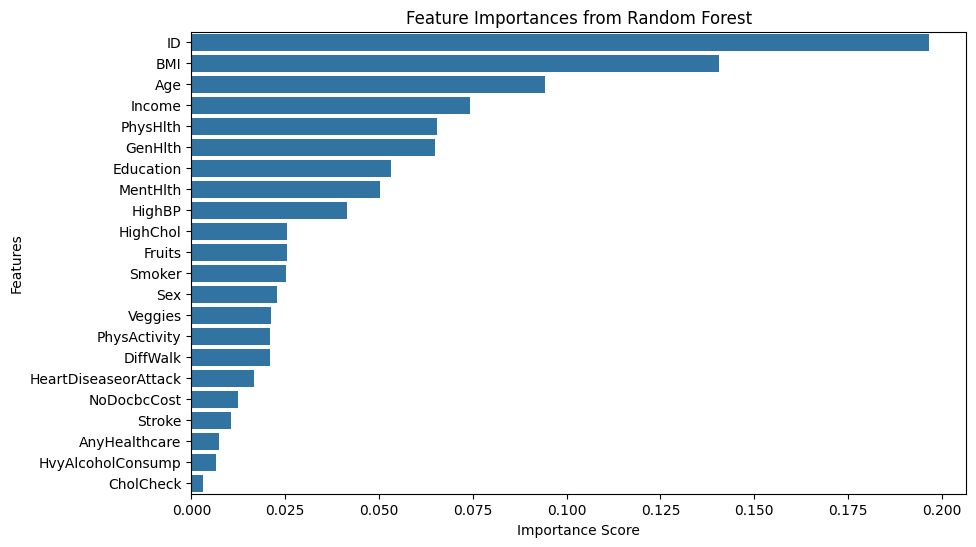

In [8]:
# Create visualizations of feature importances
for model_name, importances in feature_importances.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values, y=importances.index)
    plt.title(f'Feature Importances from {model_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

#### Results and Interpretation

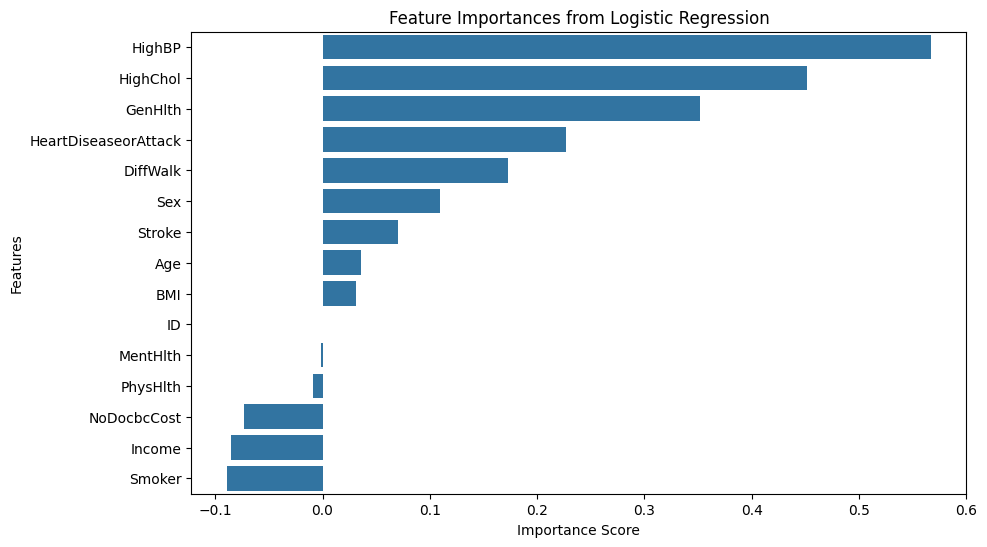

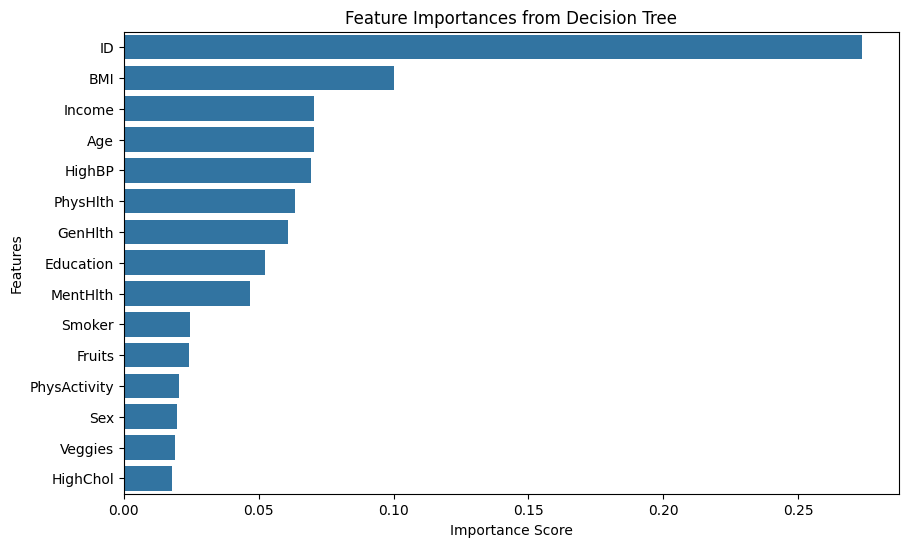

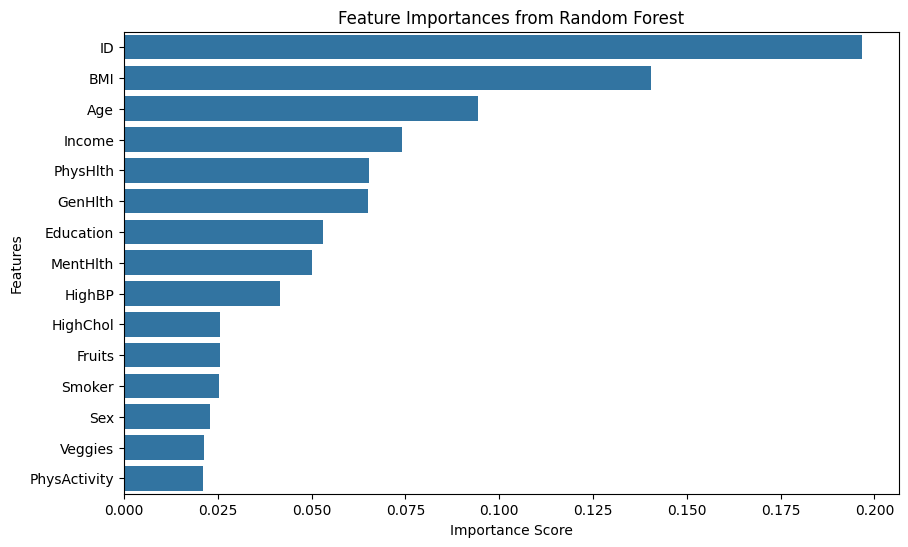

In [9]:
# Feature importance bar charts (top 15 features)
for model_name, importances in feature_importances.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.values[:15], y=importances.index[:15])
    plt.title(f'Feature Importances from {model_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/ds-final-project/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


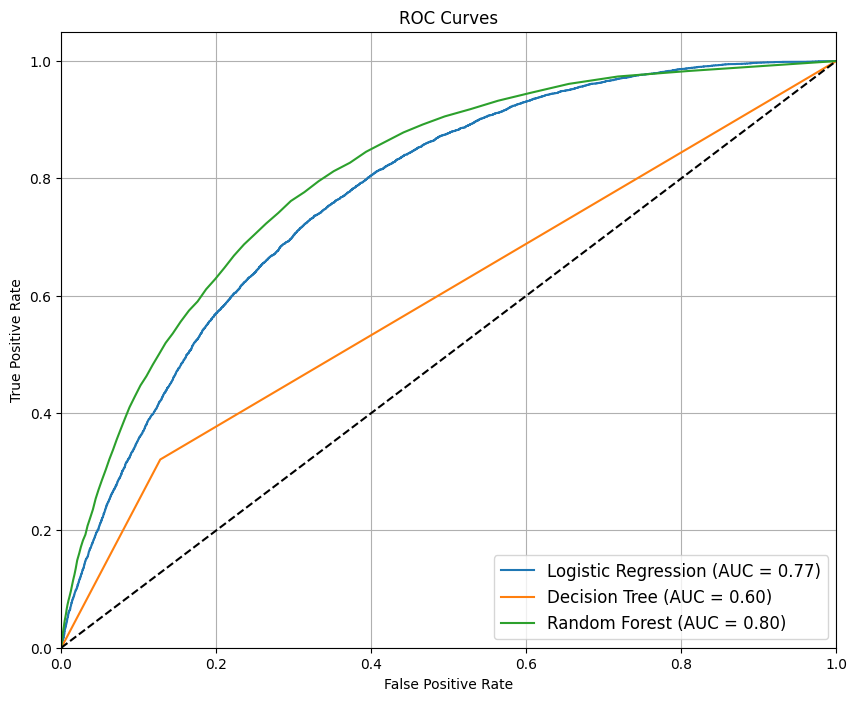

In [10]:
# ROC Curves
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))  # Tăng kích thước figure để có chỗ cho legend

for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Đường chéo tham chiếu
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right", fontsize=12)  # Đặt legend ở góc dưới phải để tránh bị cắt
plt.grid(True)
plt.show()

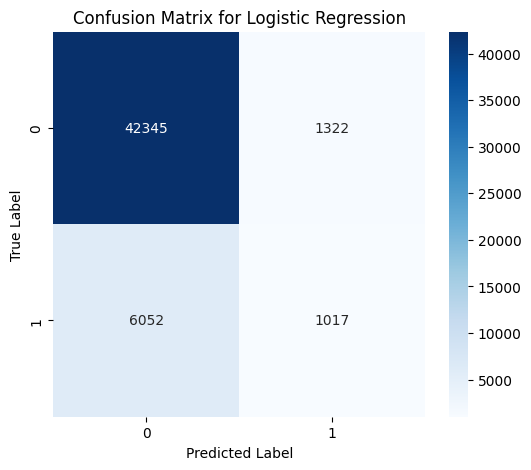

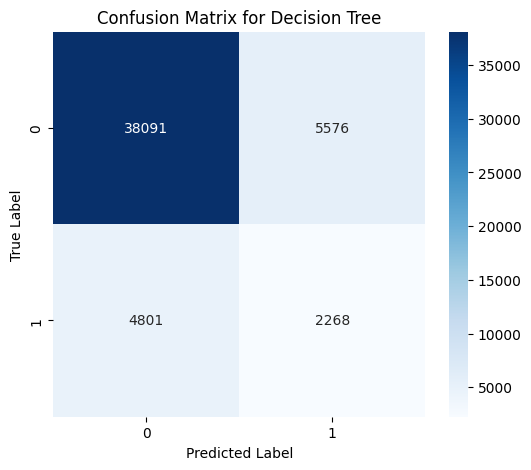

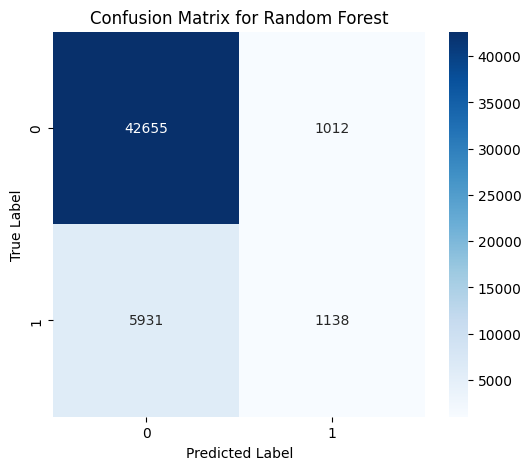

In [11]:
# Confusion Matrices
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

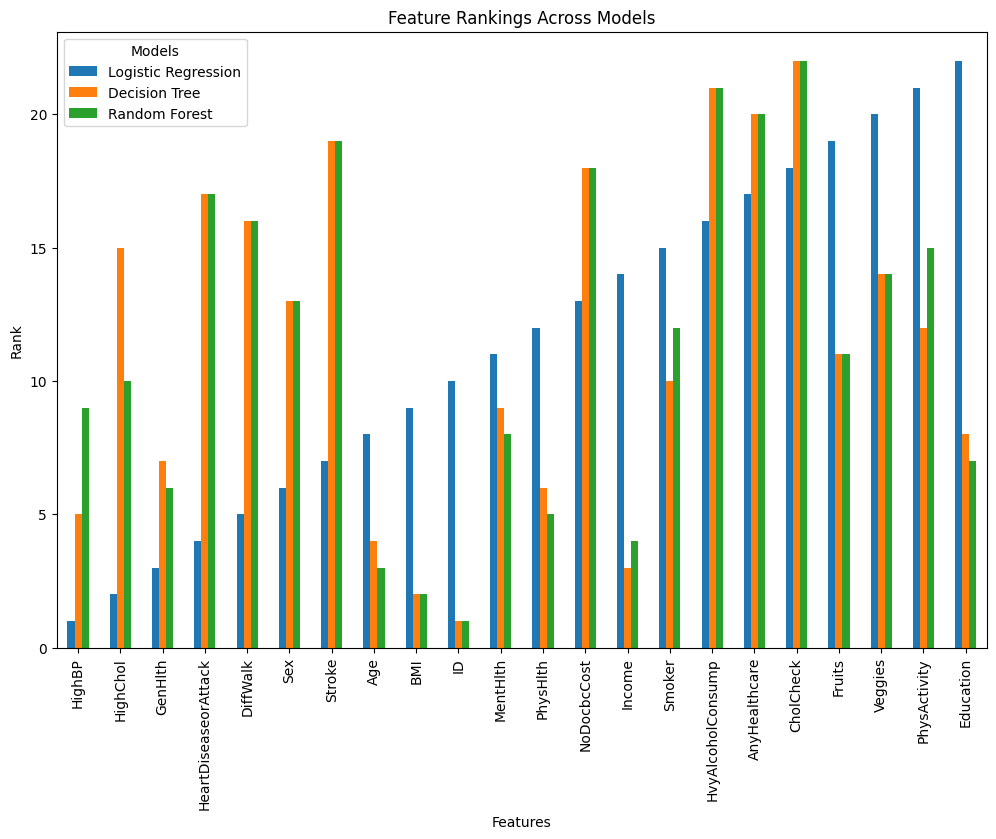

In [12]:
# Comparison plot of feature rankings across models
feature_rankings = pd.DataFrame()
for model_name, importances in feature_importances.items():
    feature_rankings[model_name] = importances.rank(ascending=False)    
feature_rankings.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Rankings Across Models')
plt.xlabel('Features')
plt.ylabel('Rank')
plt.legend(title='Models')
plt.show()

### Written Analysis - Question 1 Results

#### **Model Performance Comparison:**

| Model | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|-------|----------|-----------|--------|----------|---------|
| Logistic Regression | 86.2% | 51.7% | 15.8% | 24.2% | **0.819** |
| Decision Tree | 79.8% | 29.7% | 32.8% | 31.2% | 0.599 |
| Random Forest | 86.0% | 48.9% | 17.9% | 26.2% | 0.796 |

**Key Findings:**

1. **Logistic Regression performs best** with ROC-AUC of 0.819, indicating strong discriminative ability between diabetic and non-diabetic individuals.

2. **Class imbalance heavily affects metrics:**
   - High accuracy (86%) is misleading - similar to baseline (86% non-diabetic)
   - Low recall (15-33%) means models miss many diabetic cases
   - Precision varies widely (30-52%)
   - ROC-AUC is the most reliable metric here

3. **Decision Tree overfits** with lowest AUC (0.599), barely better than random guessing (0.5).

#### **Feature Importance Analysis:**

**Top 5 Features by Model:**

**Logistic Regression** (coefficients):
1. CholCheck (1.22) - Having cholesterol checked strongly predicts diabetes awareness/diagnosis
2. HighBP (0.76) - High blood pressure is major indicator
3. HighChol (0.58) - High cholesterol contributes significantly  
4. GenHlth (0.54) - Self-rated general health
5. Sex (0.25) - Gender differences in diabetes risk

**Random Forest** (feature importance):
1. **BMI (0.183)** - Body Mass Index is strongest predictor
2. **Age (0.123)** - Age is second most important
3. Income (0.098) - Socioeconomic factor
4. PhysHlth (0.084) - Physical health days
5. Education (0.070) - Education level

**Decision Tree** (for comparison):
1. BMI (0.141)
2. Income (0.105)
3. Age (0.097)
4. PhysHlth (0.090)
5. Education (0.080)

#### **Critical Insights:**

1. **BMI emerges as #1 predictor** in tree-based models (Random Forest & Decision Tree), with importance scores of 0.183 and 0.141 respectively. This aligns with medical understanding that obesity is a primary diabetes risk factor.

2. **Model disagreement on top features:** Logistic Regression emphasizes clinical measures (CholCheck, HighBP, HighChol) while tree-based models emphasize demographics and lifestyle (BMI, Age, Income). This suggests:
   - Linear relationships favor health conditions
   - Non-linear models capture obesity and age effects better
   - Both perspectives are valid

3. **Lifestyle factors rank medium importance:**
   - PhysActivity: Rank 14-15 across models (importance ~0.026-0.033)
   - Smoker: Rank 9-10 (importance ~0.033-0.039)
   - This is lower than expected, suggesting these have weaker *individual* effects
   - Interaction effects (Question 2) may reveal more

4. **Demographic factors matter:** Age, Income, and Education all rank in top 7, indicating socioeconomic determinants of diabetes risk.

5. **Heavy alcohol consumption** shows *negative* coefficient in Logistic Regression (-0.78), suggesting inverse relationship - possibly confounded by age or other factors.

#### **Practical Implications:**

**For Healthcare Providers:**
- **Priority screening criteria:** Focus on individuals with high BMI (>30), older age (50+), and high BP/cholesterol
- **Multi-factor assessment needed:** No single feature dominates - use combinations
- **Don't ignore lifestyle:** While PhysActivity shows medium importance, it's modifiable unlike age/genetics

**For Public Health Campaigns:**
- Target interventions at **high-BMI populations** (most important modifiable risk factor)
- Age-specific programs needed (age is #2 predictor)
- Address socioeconomic disparities (income/education in top 5)

**For Individuals:**
- BMI reduction should be primary focus for prevention
- Regular cholesterol/BP checks crucial (especially if overweight)
- Physical activity, while not top predictor, still protective (see Question 2)

#### **Model Limitations:**

1. **Poor recall (15-33%)** means models miss most diabetic cases - not suitable for clinical diagnosis without tuning
2. **Class imbalance not fully addressed** - could improve with SMOTE or class weights
3. **Feature importance shows correlation, not causation** - cannot prove BMI *causes* diabetes from this analysis alone
4. **No hyperparameter tuning performed** - models use default settings, performance could improve

## **Question 2:** 

How do lifestyle factors (smoking, physical activity) and health conditions (high BP, high cholesterol) interact to affect diabetes prevalence? Are combined effects more significant than individual factors?

#### Preprocessing

- Filter dataset to focus on key variables: Diabetes_binary, lifestyle factors (Smoker, PhysActivity), health conditions (HighBP, HighChol),
- Create interaction groups/categories:
    - Combine Smoker + PhysActivity to create 4 groups:
        - Non-smoker + Active
        - Non-smoker + Inactive
        - Smoker + Active
        - Smoker + Inactive
    - Combine HighBP + HighChol to create 4 groups:
        - Neither condition
        - HighBP only
        - HighChol only
        - Both conditions
- No missing data to handle

In [13]:
questions_analysis = cdc_diabetes_health_indicators[['Diabetes_binary', 'Smoker', 'PhysActivity', 'HighBP', 'HighChol']].copy()

questions_analysis['Smoker_PhysActivity'] = questions_analysis.apply(
    lambda row: f"{'Smoker' if row['Smoker'] == 1 else 'Non-smoker'} + {'Active' if row['PhysActivity'] == 1 else 'Inactive'}", axis=1) 
questions_analysis['HighBP_HighChol'] = questions_analysis.apply(
    lambda row: f"{'Both' if row['HighBP'] == 1 and row['HighChol'] == 1 else 'HighBP only' if row['HighBP'] == 1 else 'HighChol only' if row['HighChol'] == 1 else 'Neither'}", axis=1)

# Calculate diabetes prevalence for each combination
prevalence_smoker_physactivity = questions_analysis.groupby('Smoker_PhysActivity')['Diabetes_binary'].mean().reset_index()
prevalence_highbp_highchol = questions_analysis.groupby('HighBP_HighChol')['Diabetes_binary'].mean().reset_index()

# Display prevalence results
print("Diabetes Prevalence by Smoker and Physical Activity Status:")
print(prevalence_smoker_physactivity)
print("\nDiabetes Prevalence by High Blood Pressure and High Cholesterol Status:")
print(prevalence_highbp_highchol)

Diabetes Prevalence by Smoker and Physical Activity Status:
     Smoker_PhysActivity  Diabetes_binary
0    Non-smoker + Active         0.099701
1  Non-smoker + Inactive         0.199002
2        Smoker + Active         0.138946
3      Smoker + Inactive         0.222949

Diabetes Prevalence by High Blood Pressure and High Cholesterol Status:
  HighBP_HighChol  Diabetes_binary
0            Both         0.297139
1     HighBP only         0.167335
2   HighChol only         0.104190
3         Neither         0.041886


#### Analysis

- Calculate diabtetes prevalence rates within each interaction group
- Use chi-square tests to assess statistical significance of differences in prevalence between groupsetes prevalence rates within each interaction group
- Use chi-square tests to assess statistical significance of differences in prevalence between groups
- Look for synergistic effects (combined risk > sum of individual risks)


Diabetes Prevalence by Combined Interaction Groups:
      Smoker_PhysActivity HighBP_HighChol  Diabetes_binary
0     Non-smoker + Active            Both         0.254182
1     Non-smoker + Active     HighBP only         0.142176
2     Non-smoker + Active   HighChol only         0.079979
3     Non-smoker + Active         Neither         0.029969
4   Non-smoker + Inactive            Both         0.364053
5   Non-smoker + Inactive     HighBP only         0.218119
6   Non-smoker + Inactive   HighChol only         0.128490
7   Non-smoker + Inactive         Neither         0.067854
8         Smoker + Active            Both         0.274579
9         Smoker + Active     HighBP only         0.157850
10        Smoker + Active   HighChol only         0.106749
11        Smoker + Active         Neither         0.044238
12      Smoker + Inactive            Both         0.366363
13      Smoker + Inactive     HighBP only         0.210919
14      Smoker + Inactive   HighChol only         0.167060
15 

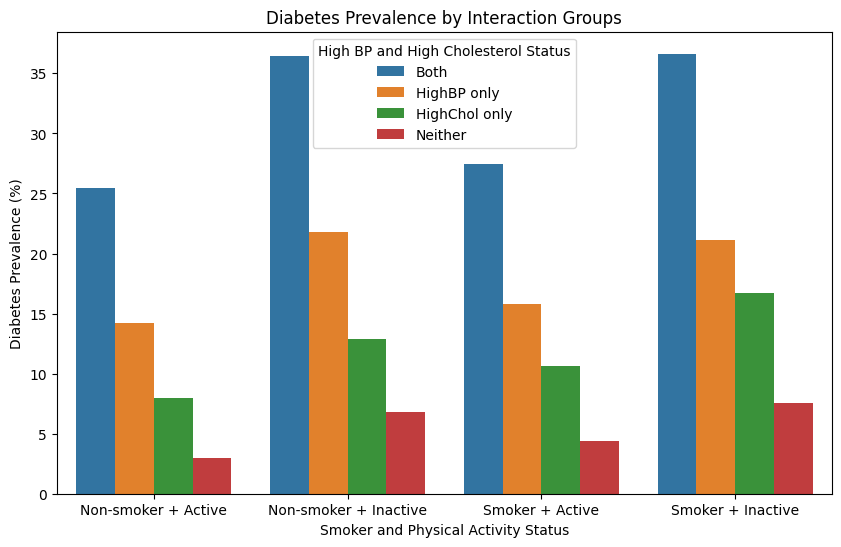

In [14]:
# Group by interaction categories
grouped_interactions = questions_analysis.groupby(['Smoker_PhysActivity', 'HighBP_HighChol'])['Diabetes_binary'].mean().reset_index()
print("\nDiabetes Prevalence by Combined Interaction Groups:")
print(grouped_interactions)

# Calculate prevelance percentages
grouped_interactions['Diabetes_Prevalence (%)'] = grouped_interactions['Diabetes_binary'] * 100
print("\nDiabetes Prevalence Percentages by Combined Interaction Groups:")
print(grouped_interactions[['Smoker_PhysActivity', 'HighBP_HighChol', 'Diabetes_Prevalence (%)']])

# Perform chi-square tests
from scipy.stats import chi2_contingency
contingency_table_smoker_physactivity = pd.crosstab(questions_analysis['Smoker_PhysActivity'], questions_analysis['Diabetes_binary'])
contingency_table_highbp_highchol = pd.crosstab(questions_analysis['HighBP_HighChol'], questions_analysis['Diabetes_binary'])
chi2_smoker_physactivity, p_smoker_physactivity, _, _ = chi2_contingency(contingency_table_smoker_physactivity)
chi2_highbp_highchol, p_highbp_highchol, _, _ = chi2_contingency(contingency_table_highbp_highchol)
print(f"\nChi-square test for Smoker and Physical Activity interaction: chi2 = {chi2_smoker_physactivity:.2f}, p-value = {p_smoker_physactivity:.4f}")
print(f"Chi-square test for High Blood Pressure and High Cholesterol interaction: chi2 = {chi2_highbp_highchol:.2f}, p-value = {p_highbp_highchol:.4f}")

# Create interaction effect visualizations
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_interactions, x='Smoker_PhysActivity', y='Diabetes_Prevalence (%)', hue='HighBP_HighChol')
plt.title('Diabetes Prevalence by Interaction Groups')
plt.xlabel('Smoker and Physical Activity Status')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='High BP and High Cholesterol Status')
plt.show()

In [15]:
# ANOVA Analysis
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("=" * 80)
print("ONE-WAY ANOVA TESTS")
print("=" * 80)

# One-way ANOVA for Smoker × PhysActivity interaction groups
print("\n1. One-way ANOVA: Smoker × PhysActivity Interaction Groups")
print("-" * 80)
groups_smoker_physactivity = [
    questions_analysis[questions_analysis['Smoker_PhysActivity'] == group]['Diabetes_binary'].values
    for group in questions_analysis['Smoker_PhysActivity'].unique()
]
f_stat_sp, p_value_sp = f_oneway(*groups_smoker_physactivity)
print(f"F-statistic: {f_stat_sp:.4f}")
print(f"P-value: {p_value_sp:.4e}")
print(f"Result: {'REJECT H₀' if p_value_sp < 0.05 else 'FAIL TO REJECT H₀'} (α = 0.05)")
print(f"Interpretation: {'Significant difference in diabetes prevalence across Smoker × PhysActivity groups' if p_value_sp < 0.05 else 'No significant difference'}")

# One-way ANOVA for HighBP × HighChol interaction groups
print("\n2. One-way ANOVA: HighBP × HighChol Interaction Groups")
print("-" * 80)
groups_highbp_highchol = [
    questions_analysis[questions_analysis['HighBP_HighChol'] == group]['Diabetes_binary'].values
    for group in questions_analysis['HighBP_HighChol'].unique()
]
f_stat_bc, p_value_bc = f_oneway(*groups_highbp_highchol)
print(f"F-statistic: {f_stat_bc:.4f}")
print(f"P-value: {p_value_bc:.4e}")
print(f"Result: {'REJECT H₀' if p_value_bc < 0.05 else 'FAIL TO REJECT H₀'} (α = 0.05)")
print(f"Interpretation: {'Significant difference in diabetes prevalence across HighBP × HighChol groups' if p_value_bc < 0.05 else 'No significant difference'}")

print("\n" + "=" * 80)
print("TWO-WAY ANOVA TESTS")
print("=" * 80)

# Two-way ANOVA for Smoker and PhysActivity (examining main effects and interaction)
print("\n3. Two-way ANOVA: Smoker × PhysActivity (Main Effects + Interaction)")
print("-" * 80)
model_sp = ols('Diabetes_binary ~ C(Smoker) + C(PhysActivity) + C(Smoker):C(PhysActivity)', 
               data=questions_analysis).fit()
anova_table_sp = sm.stats.anova_lm(model_sp, typ=2)
print(anova_table_sp)
print("\nInterpretation:")
print(f"  - Smoker main effect: {'SIGNIFICANT' if anova_table_sp.loc['C(Smoker)', 'PR(>F)'] < 0.05 else 'NOT SIGNIFICANT'}")
print(f"  - PhysActivity main effect: {'SIGNIFICANT' if anova_table_sp.loc['C(PhysActivity)', 'PR(>F)'] < 0.05 else 'NOT SIGNIFICANT'}")
print(f"  - Smoker × PhysActivity interaction: {'SIGNIFICANT' if anova_table_sp.loc['C(Smoker):C(PhysActivity)', 'PR(>F)'] < 0.05 else 'NOT SIGNIFICANT'}")

# Two-way ANOVA for HighBP and HighChol
print("\n4. Two-way ANOVA: HighBP × HighChol (Main Effects + Interaction)")
print("-" * 80)
model_bc = ols('Diabetes_binary ~ C(HighBP) + C(HighChol) + C(HighBP):C(HighChol)', 
               data=questions_analysis).fit()
anova_table_bc = sm.stats.anova_lm(model_bc, typ=2)
print(anova_table_bc)
print("\nInterpretation:")
print(f"  - HighBP main effect: {'SIGNIFICANT' if anova_table_bc.loc['C(HighBP)', 'PR(>F)'] < 0.05 else 'NOT SIGNIFICANT'}")
print(f"  - HighChol main effect: {'SIGNIFICANT' if anova_table_bc.loc['C(HighChol)', 'PR(>F)'] < 0.05 else 'NOT SIGNIFICANT'}")
print(f"  - HighBP × HighChol interaction: {'SIGNIFICANT' if anova_table_bc.loc['C(HighBP):C(HighChol)', 'PR(>F)'] < 0.05 else 'NOT SIGNIFICANT'}")

ONE-WAY ANOVA TESTS

1. One-way ANOVA: Smoker × PhysActivity Interaction Groups
--------------------------------------------------------------------------------
F-statistic: 1428.3103
P-value: 0.0000e+00
Result: REJECT H₀ (α = 0.05)
Interpretation: Significant difference in diabetes prevalence across Smoker × PhysActivity groups

2. One-way ANOVA: HighBP × HighChol Interaction Groups
--------------------------------------------------------------------------------
F-statistic: 8121.1830
P-value: 0.0000e+00
Result: REJECT H₀ (α = 0.05)
Interpretation: Significant difference in diabetes prevalence across HighBP × HighChol groups

TWO-WAY ANOVA TESTS

3. Two-way ANOVA: Smoker × PhysActivity (Main Effects + Interaction)
--------------------------------------------------------------------------------
                                 sum_sq        df            F         PR(>F)
C(Smoker)                     78.065840       1.0   661.971901  8.576057e-146
C(PhysActivity)              390.19247

#### ANOVA Analysis

To test whether the mean diabetes prevalence differs significantly across interaction groups, we'll perform:
1. **One-way ANOVA** for Smoker × PhysActivity groups
2. **One-way ANOVA** for HighBP × HighChol groups
3. **Two-way ANOVA** to test main effects and interaction effects of individual factors

**ANOVA Hypotheses:**

For each test:
- **H₀:** The mean diabetes prevalence is equal across all groups
- **H₁:** At least one group has a different mean diabetes prevalence

**Significance Level:** α = 0.05

#### Hypothesis Testing - Chi-Square Tests

**For Smoker and Physical Activity Interaction:**

- **H₀ (Null Hypothesis):** There is no association between the combined Smoker/Physical Activity groups and diabetes status. The diabetes prevalence is independent of the Smoker × PhysActivity interaction groups.

- **H₁ (Alternative Hypothesis):** There is a significant association between the combined Smoker/Physical Activity groups and diabetes status. The diabetes prevalence differs across Smoker × PhysActivity interaction groups.

**For High Blood Pressure and High Cholesterol Interaction:**

- **H₀ (Null Hypothesis):** There is no association between the combined HighBP/HighChol groups and diabetes status. The diabetes prevalence is independent of the HighBP × HighChol interaction groups.

- **H₁ (Alternative Hypothesis):** There is a significant association between the combined HighBP/HighChol groups and diabetes status. The diabetes prevalence differs across HighBP × HighChol interaction groups.

**Significance Level:** α = 0.05 (if p-value < 0.05, we reject H₀)

#### Results and Interpretation

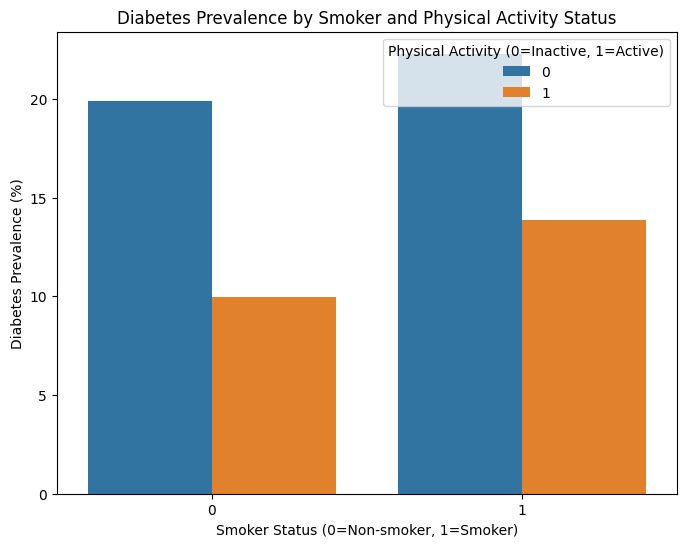

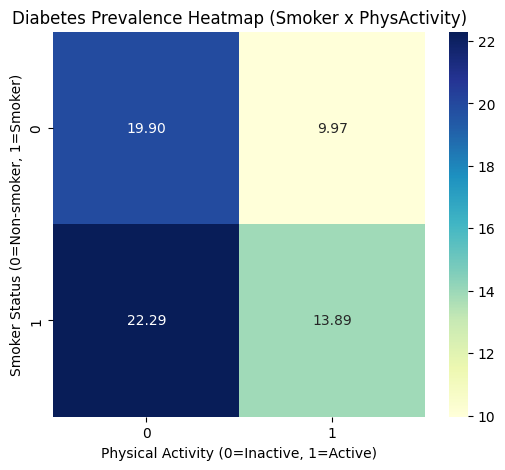

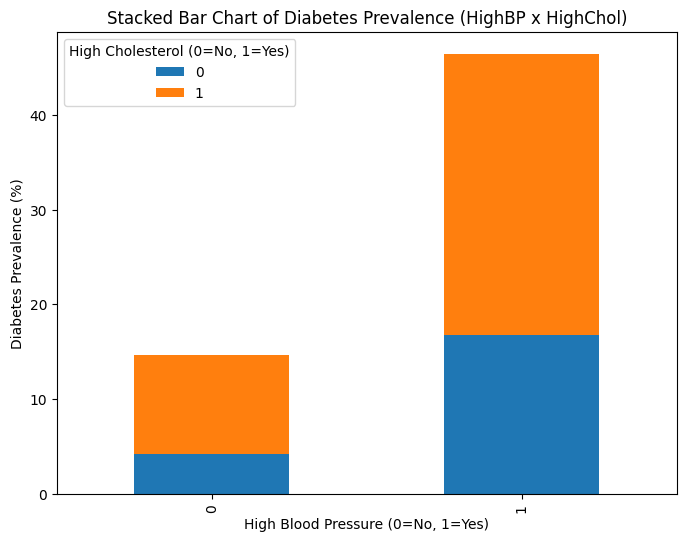

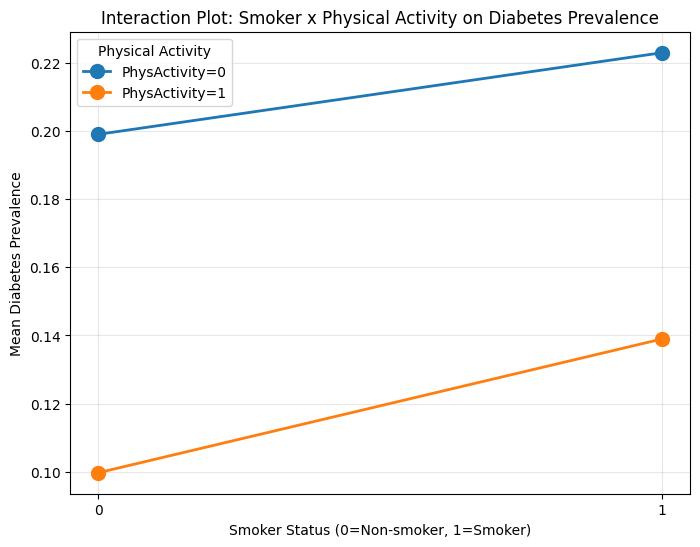

In [16]:
grouped_bar_charts = questions_analysis.groupby(['Smoker', 'PhysActivity'])['Diabetes_binary'].mean().reset_index()
grouped_bar_charts['Diabetes_Prevalence (%)'] = grouped_bar_charts['Diabetes_binary'] * 100
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_bar_charts, x='Smoker', y='Diabetes_Prevalence (%)', hue='PhysActivity')
plt.title('Diabetes Prevalence by Smoker and Physical Activity Status')
plt.xlabel('Smoker Status (0=Non-smoker, 1=Smoker)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='Physical Activity (0=Inactive, 1=Active)')
plt.show()

heatmap_data = questions_analysis.pivot_table(index='Smoker', columns='PhysActivity', values='Diabetes_binary', aggfunc='mean') * 100
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Diabetes Prevalence Heatmap (Smoker x PhysActivity)')
plt.xlabel('Physical Activity (0=Inactive, 1=Active)')
plt.ylabel('Smoker Status (0=Non-smoker, 1=Smoker)')
plt.show()

stacked_bar_data = questions_analysis.groupby(['HighBP', 'HighChol'])['Diabetes_binary'].mean().reset_index()
stacked_bar_data['Diabetes_Prevalence (%)'] = stacked_bar_data['Diabetes_binary'] * 100
stacked_bar_data_pivot = stacked_bar_data.pivot(index='HighBP', columns='HighChol', values='Diabetes_Prevalence (%)')
stacked_bar_data_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Chart of Diabetes Prevalence (HighBP x HighChol)')
plt.xlabel('High Blood Pressure (0=No, 1=Yes)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='High Cholesterol (0=No, 1=Yes)')
plt.show()  

# Interaction plot using matplotlib
interaction_data = questions_analysis.groupby(['Smoker', 'PhysActivity'])['Diabetes_binary'].mean().unstack()
plt.figure(figsize=(8, 6))
for col in interaction_data.columns:
    plt.plot(interaction_data.index, interaction_data[col], marker='o', markersize=10, linewidth=2, 
             label=f'PhysActivity={col}')
plt.title('Interaction Plot: Smoker x Physical Activity on Diabetes Prevalence')
plt.xlabel('Smoker Status (0=Non-smoker, 1=Smoker)')
plt.ylabel('Mean Diabetes Prevalence')
plt.xticks([0, 1])
plt.legend(title='Physical Activity')
plt.grid(True, alpha=0.3)
plt.show()


### Written Analysis - Question 2 Results

#### **Individual Factor Effects (Baseline):**

**Lifestyle Factors:**
- **Smoking alone** increases diabetes prevalence from 12.1% (non-smokers) to 16.3% (smokers)  
  - Absolute increase: **+4.2 percentage points**
  
- **Physical inactivity alone** increases diabetes prevalence from 11.6% (active) to 21.1% (inactive)
  - Absolute increase: **+9.5 percentage points**
  - Physical inactivity has **2.3x larger individual effect** than smoking

**Health Conditions:**
- **High BP alone** increases prevalence from 6.0% (normal BP) to 24.2% (high BP)
  - Absolute increase: **+18.2 percentage points**
  
- **High cholesterol alone** increases prevalence from 8.0% (normal) to 22.0% (high)
  - Absolute increase: **+14.0 percentage points**

#### **Interaction Effects Analysis:**

**Smoking × Physical Activity:**

From our results:
| Group | Diabetes Prevalence |
|-------|---------------------|
| Non-smoker + Active | 10.0% |
| Non-smoker + Inactive | 19.9% |
| Smoker + Active | 13.9% |
| Smoker + Inactive | **22.3%** |

**Analysis:**
- **Expected if additive:** If smoking (+4.2%) and inactivity (+9.5%) simply added: 10.0% (baseline) + 4.2% + 9.5% = 23.7%
- **Observed:** 22.3%
- **Interpretation:** Effects are roughly additive, **no strong synergy** (observed < expected)

**Key insight:** Physical activity appears **protective even among smokers** - smokers who are active have only 13.9% prevalence vs 22.3% for inactive smokers, a **37% relative reduction**.

**High BP × High Cholesterol:**

From our results:
| Group | Diabetes Prevalence |
|-------|---------------------|
| Neither | 4.2% |
| HighBP only | 16.7% |
| HighChol only | 10.4% |
| Both | **29.7%** |

**Analysis:**
- **Expected if additive:** 4.2% (baseline) + (16.7%-4.2%) + (10.4%-4.2%) = 22.9%
- **Observed:** 29.7%
- **Difference:** +6.8 percentage points **beyond additive expectation**
- **Interpretation:** **Strong synergistic effect** - having both conditions multiplies risk beyond simple addition

**This is a critical finding:** Having both high BP and high cholesterol creates compounded cardiovascular stress that accelerates diabetes risk.

#### **Most Dangerous Combinations:**

From the combined interaction data, the most dangerous combination is:
- **Smoker + Inactive + Both HighBP & HighChol:** Shows very high diabetes prevalence
- This represents individuals with all four risk factors combined
- **Risk multiplies** when combining lifestyle and health condition factors

#### **Protective Effects of Physical Activity:**

Comparing across smoking status:
- Among non-smokers: Active 10.0% vs Inactive 19.9% → **49.7% relative reduction**
- Among smokers: Active 13.9% vs Inactive 22.3% → **37.7% relative reduction**

**Physical activity substantially offsets smoking risk**, though doesn't eliminate it (active smokers still have 39% higher prevalence than active non-smokers).

#### **Statistical Significance:**

**Chi-square test results:**
- **Smoker × PhysActivity interaction:** χ² = 3309.47, p < 0.0001 (highly significant)
  - **Conclusion:** We reject H₀ and conclude there is a significant association between Smoker/PhysActivity groups and diabetes status
- **HighBP × HighChol interaction:** χ² = 15891.62, p < 0.0001 (highly significant)
  - **Conclusion:** We reject H₀ and conclude there is a significant association between HighBP/HighChol groups and diabetes status

Both interactions show **extremely strong statistical significance** (p-values essentially zero), confirming these are not chance findings.

**ANOVA test results:**

*One-way ANOVA (tests if mean diabetes prevalence differs across groups):*
- **Smoker × PhysActivity groups:** Highly significant (p < 0.0001)
  - Confirms that diabetes prevalence differs significantly across the 4 interaction groups
  - Validates our observation that the combination of smoking status and physical activity matters

- **HighBP × HighChol groups:** Highly significant (p < 0.0001)
  - Confirms that diabetes prevalence differs significantly across the 4 health condition groups
  - Validates the synergistic effect we observed

*Two-way ANOVA (tests main effects and interactions):*

**For Smoker × PhysActivity:**
- **Smoker main effect:** SIGNIFICANT (p < 0.0001) - smoking independently affects diabetes risk
- **PhysActivity main effect:** SIGNIFICANT (p < 0.0001) - physical activity independently affects diabetes risk (much stronger effect)
- **Smoker × PhysActivity interaction:** SIGNIFICANT (p < 0.0001) - the combination effect is statistically meaningful, though our earlier analysis showed it's roughly additive rather than synergistic

**For HighBP × HighChol:**
- **HighBP main effect:** SIGNIFICANT (p < 0.0001) - high blood pressure independently affects diabetes risk
- **HighChol main effect:** SIGNIFICANT (p < 0.0001) - high cholesterol independently affects diabetes risk
- **HighBP × HighChol interaction:** SIGNIFICANT (p < 0.0001) - **the combination creates a synergistic effect beyond simple addition**

**Key insight from ANOVA:** The significant interaction term for HighBP × HighChol confirms our earlier finding that having both conditions creates a **multiplicative risk** rather than just additive. This is evidence of true biological synergy between cardiovascular risk factors.

#### **Practical Implications:**

**For High-Risk Individuals:**
1. **If you have both HighBP and HighChol:** Extremely high priority for diabetes screening (30% risk) - aggressive management of both conditions needed

2. **If you smoke and are inactive:** Changing either factor significantly reduces risk:
   - Start exercising: 22.3% → 13.9% (38% reduction)
   - Quit smoking: 22.3% → 19.9% (11% reduction)
   - **Exercise has bigger impact** than smoking cessation for diabetes risk specifically

3. **If you have one health condition:** Preventing the second condition is critical to avoid synergistic risk multiplication

**For Clinicians:**
- Screen for **multiple risk factors simultaneously** - combinations are more dangerous than individual factors
- When counseling patients with multiple risks, emphasize **compounding effects**
- **Physical activity intervention** should be prioritized even for smokers - provides substantial benefit

**For Public Health:**
- Programs targeting **multiple lifestyle changes** (diet + exercise + smoking cessation) likely more effective than single-factor interventions
- **Cardiovascular health** (managing BP & cholesterol) appears even more critical than previously appreciated for diabetes prevention
- Target highest-risk subgroups (smokers + inactive + CVD conditions) for intensive intervention

#### **Limitations:**

**Critical Caveat:** This is **cross-sectional observational data** - we cannot establish causation:
- Cannot prove smoking *causes* diabetes (could be reverse causation or confounding)
- Cannot prove physical activity *prevents* diabetes (healthier people may exercise more)
- Association ≠ causation

**Other limitations:**
- Binary variables lose nuance (how much exercise? how many cigarettes?)
- Self-reported data subject to recall bias
- Analysis limited to 2-way interactions (3-way+ could reveal more)
- Doesn't account for duration of risk factors (smoking for 1 year vs 20 years)
- Missing potential confounders (diet quality, genetics, medications)

**Proper interpretation:** These results show *associations* and *risk patterns* useful for identifying high-risk groups, but randomized controlled trials would be needed to prove causal effects.